In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import tensorflow as tf
from keras.layers import Input
from keras.models import Model

# keras를 이용한 softmax

## EDA

In [19]:
data = pd.read_csv("/content/drive/My Drive/190000 멀티캠퍼스/Data/iris.csv")
len(data)

150

In [20]:
data[:5]

,sepal.length,sepal.width,petal.length,petal.width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [21]:
data["Species"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

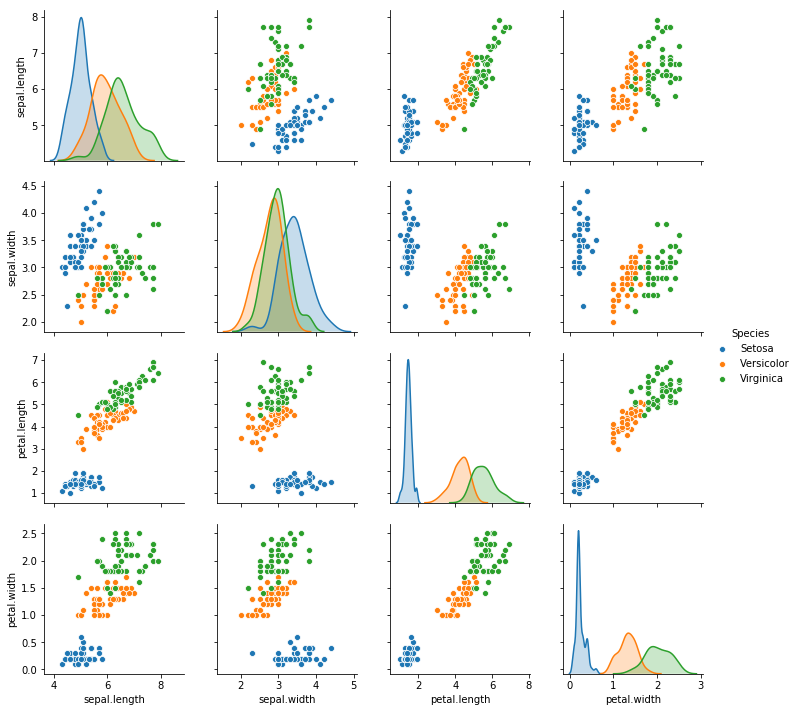

In [22]:
sns.pairplot(data, hue="Species")

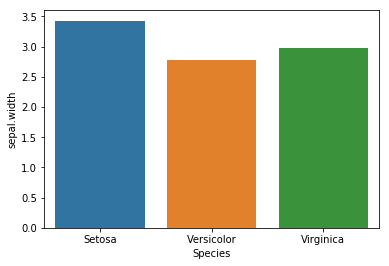

In [23]:
sns.barplot(data["Species"], data["sepal.width"], ci=None)    # ci: 오차선 존재 유무

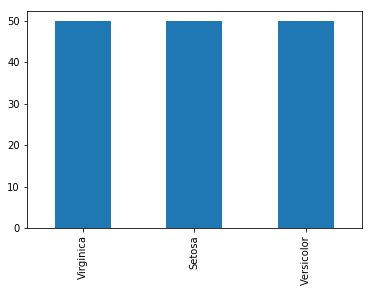

In [24]:
data["Species"].value_counts().plot(kind="bar")

## 전처리

In [0]:
data["Species"] = data["Species"].replace(["Setosa", "Versicolor", "Virginica"], [0, 1, 2])

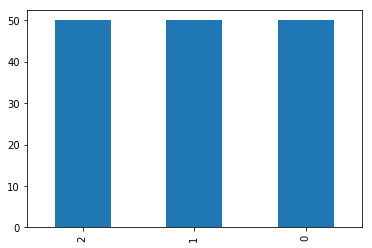

In [26]:
data["Species"].value_counts().plot(kind="bar")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal.length    150 non-null float64
sepal.width     150 non-null float64
petal.length    150 non-null float64
petal.width     150 non-null float64
Species         150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [0]:
datax = data[["sepal.length", "sepal.width", "petal.length", "petal.width"]].values    # 소프트맥스 처리할때는 데이터프레임이 아니라 array 형태로 들어가야 하므로 .values를 붙여준다
datay = data["Species"].values

In [0]:
(xtrain, xtest, ytrain, ytest) = train_test_split(datax, datay, train_size=0.8, random_state=1)

In [0]:
from keras.utils import np_utils
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

In [40]:
print(ytrain[:5])
print("="*10)
print(ytest[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


## keras를 이용한 소프트맥스 회귀

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [44]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation="softmax"))
sgd = optimizers.SGD(lr=0.01)    # 학습률
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])    # 실제 모델 생성    # 이진분류 할때는 binary cross-entropy 썼지만 다중분류에서는 categorical cross-entropy
history = model.fit(xtrain, ytrain, batch_size=1, epochs=200, validation_data=(xtest, ytest))

Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 2ms/step - loss: 3.7048 - acc: 0.3667 - val_loss: 4.3721 - val_acc: 0.2000
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 2.7592 - acc: 0.4167 - val_loss: 3.3084 - val_acc: 0.5000
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 2.1211 - acc: 0.6833 - val_loss: 2.4993 - val_acc: 0.5667
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 1.5733 - acc: 0.6917 - val_loss: 1.7392 - val_acc: 0.5667
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 1.1188 - acc: 0.6917 - val_loss: 1.2014 - val_acc: 0.5667
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 0.8905 - acc: 0.6417 - val_loss: 0.9307 - val_acc: 0.5333
Epoch 7/200
120/120 [==============================] - 0s 1ms/step - loss: 0.8219 - acc: 0.5333 - val_loss: 0.8418 - val_acc: 0.4667
Epoch 8/200
120/120 [===

In [45]:
history.history["acc"]

[0.36666666666666664,
 0.4166666666666667,
 0.6833333333333333,
 0.6916666666666667,
 0.6916666666666667,
 0.6416666666666667,
 0.5333333333333333,
 0.575,
 0.5166666666666667,
 0.4666666666666667,
 0.5166666666666667,
 0.5083333333333333,
 0.5,
 0.5166666666666667,
 0.5666666666666667,
 0.5166666666666667,
 0.5666666666666667,
 0.5166666666666667,
 0.6333333333333333,
 0.5,
 0.5833333333333334,
 0.6416666666666667,
 0.5416666666666666,
 0.5916666666666667,
 0.6416666666666667,
 0.5416666666666666,
 0.65,
 0.6416666666666667,
 0.6666666666666666,
 0.5833333333333334,
 0.65,
 0.6666666666666666,
 0.675,
 0.6833333333333333,
 0.675,
 0.65,
 0.7,
 0.6916666666666667,
 0.7,
 0.7,
 0.75,
 0.7083333333333334,
 0.7416666666666667,
 0.7333333333333333,
 0.7666666666666667,
 0.725,
 0.775,
 0.7583333333333333,
 0.775,
 0.75,
 0.8083333333333333,
 0.8166666666666667,
 0.825,
 0.8083333333333333,
 0.8,
 0.8166666666666667,
 0.8666666666666667,
 0.8166666666666667,
 0.825,
 0.825,
 0.8333333333333

In [46]:
history.history["loss"]

[3.7047502226399955,
 2.759204010370498,
 2.1210589658468963,
 1.5732891978075108,
 1.1187851022928954,
 0.8905202999711037,
 0.8218790182222923,
 0.7886715723822514,
 0.7688021712005139,
 0.7469571519643068,
 0.7350301098078489,
 0.7136778492480517,
 0.6980512047807376,
 0.6850941653052965,
 0.67121534285446,
 0.6566114674632748,
 0.6478516137227416,
 0.634677424095571,
 0.6270771150787672,
 0.6169392984360457,
 0.6070139884638289,
 0.5955780516999464,
 0.5859570743516087,
 0.5812894513209661,
 0.5735637318032484,
 0.5654103883852561,
 0.5585870315941671,
 0.553429092404743,
 0.543261879744629,
 0.5377943298003326,
 0.5305016559238235,
 0.5235418236348778,
 0.5201349310576916,
 0.5122860904006908,
 0.5060644320522746,
 0.5055129833209018,
 0.4984774512704462,
 0.493128874587516,
 0.48891133648964263,
 0.48661234746687115,
 0.47744506554833305,
 0.474225750619856,
 0.4736955837424224,
 0.46248518823801227,
 0.46285124119992055,
 0.4540789100419109,
 0.4491680070990697,
 0.4452262510855

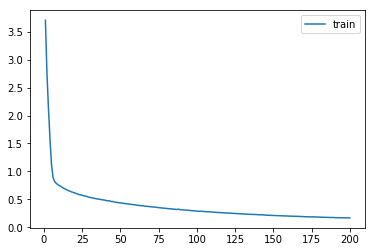

In [49]:
epochs = range(1, len(history.history["acc"])+1)
plt.plot(epochs, history.history["loss"])
plt.legend(["train", "val"], loc="upper right")
plt.show()

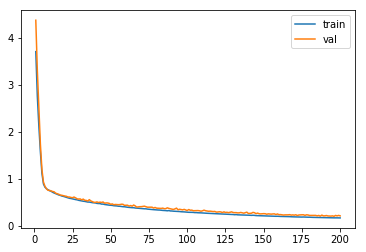

In [50]:
epochs = range(1, len(history.history["acc"])+1)
plt.plot(epochs, history.history["loss"])
plt.plot(epochs, history.history["val_loss"])
plt.legend(["train", "val"], loc="upper right")
plt.show()

In [52]:
print("테스트 정확도 : %.4f" % (model.evaluate(xtest, ytest)[1]))

30/30 [==============================] - 0s 45us/step
테스트 정확도 : 0.9667


In [53]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation="relu", init="uniform"))
# X = (1,4), W = (4,8), B = (1,8), Y = (1,8)
model.add(Dense(8, activation="relu"))    # hidden layer 1
# X = (1,8), W = (8,8), B = (1,8), Y = (1,8)
model.add(Dense(3, activation="softmax"))    # hidden layer 2
# X = (1,8), W = (8,3), B = (1,3), Y = (1,3)

# 손실함수 (MSE, CE 등)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=4, activation="relu", kernel_initializer="uniform")`
  


# keras에서 모델 만들기

model.fit(xtrain, ytrain, batch_size=len(trainx))    # 배치경사하강법: 1에폭에 모든 매개변수 업데이트를 한번 수행

model.fit(xtrain, ytrain, batch_size=16)    # 미니 배치

model.fit(xtrain, ytrain, batch_size=1)    # SGD (확률적 경사 하강법)

keras.optimizers.SGD(lr=0.01, momentum=0.9)    # momentum

# keras 문법

## Tokenizer

In [56]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer()
fitText = "The Earth is an awesome place to live"
t.fit_on_texts(fitText)    # 문자 단위
print(t.word_index)

{'e': 1, 'a': 2, 't': 3, 'h': 4, 'i': 5, 's': 6, 'o': 7, 'l': 8, 'r': 9, 'n': 10, 'w': 11, 'm': 12, 'p': 13, 'c': 14, 'v': 15}


In [57]:
t = Tokenizer()
fitText = "The Earth is an awesome place to live"
t.fit_on_texts([fitText])    # 단어 단위
print(t.word_index)

{'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'to': 7, 'live': 8}


In [59]:
t = Tokenizer()
fitText = "The Earth is an awesome place to live"    # corpus
t.fit_on_texts([fitText])

test = "The Earth is a great place to live"
t.texts_to_sequences([test])    # "a"와 "great"이란 단어는 없기 때문에 출력결과에 4, 5가 없다

[[1, 2, 3, 6, 7, 8]]

## padding

padding: 길이를 동일하게 맞춰주는 작업 => pad_sequence()

In [60]:
from keras.preprocessing.sequence import pad_sequences
pad_sequences([[10, 20, 30], [40, 50], [60, 70, 80, 90]])

array([[ 0, 10, 20, 30],
       [ 0,  0, 40, 50],
       [60, 70, 80, 90]], dtype=int32)

In [61]:
pad_sequences([[10, 20, 30], [40, 50], [60, 70, 80, 90]], maxlen=5)

array([[ 0,  0, 10, 20, 30],
       [ 0,  0,  0, 40, 50],
       [ 0, 60, 70, 80, 90]], dtype=int32)

In [62]:
pad_sequences([[10, 20, 30], [40, 50], [60, 70, 80, 90]], maxlen=3)

array([[10, 20, 30],
       [ 0, 40, 50],
       [70, 80, 90]], dtype=int32)

In [63]:
pad_sequences([[10, 20, 30], [40, 50], [60, 70, 80, 90]], maxlen=5, padding="pre")    # pre: 앞쪽에 패딩. 디폴트값.

array([[ 0,  0, 10, 20, 30],
       [ 0,  0,  0, 40, 50],
       [ 0, 60, 70, 80, 90]], dtype=int32)

In [64]:
pad_sequences([[10, 20, 30], [40, 50], [60, 70, 80, 90]], maxlen=5, padding="post")    # post: 뒤쪽에 패딩.

array([[10, 20, 30,  0,  0],
       [40, 50,  0,  0,  0],
       [60, 70, 80, 90,  0]], dtype=int32)

## Word Embedding

word embedding: 단어들을 밀집벡터(dense vector)로 변환하는 것
* [0000000000010000000...000] : 희소벡터 (1000차원, 0 or 1)
* [0.1  0.5  -1.5  1.8] : 밀집벡터 (4차원, 실수)

Embedding(정수로 된 단어)

Embedding(단어 집합의 크기, 결과 벡터의 크기, 입력 단어의 시퀀스 길이)

## Sequential

Sequential: 층을 구성 => model => model.add()
* 예: model = Sequential() , model.add(Embedding(voc, size, length))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


## fit

fit(): 실제 학습
* 예: model.fit(xtrain, ytrain, epochs=10, batch_size=64, validation_data=(x_val, y_val))

## 모델 평가와 예측

model.evaluate(xtest, ytest, batch_size=32)

model.predict(xinput, batch_size=32)

## 모델 저장

model.save("my_model.h5")

## 모델 불러오기

from keras.models import load_model

model = load.model("my_model.h5")

# Tensorflow에서 모델 저장

In [68]:
import tensorflow as tf

xdata = [1, 2, 3]
ydata = [1, 2, 3]

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hf = w * x + b
cost = tf.reduce_mean((hf - y) ** 2)
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
feed = {x:xdata, y:ydata}

saver = tf.train.Saver()

for i in range(2001):
  sess.run(train, feed_dict=feed)
  if i % 20 == 0:
    print(i, sess.run(cost, feed_dict=feed))
    saver.save(sess, "Model/second", global_step=i)

saver.save(sess, "Model/first")   # 작업 폴더에 "Model"이라는 폴더가 생기고 그 밑에 "first"라는 파일이 생긴다
# 세션 객체를 저장하는 것

0 0.17157799
20 0.0075945538
40 0.0028694116
60 0.0010841453


W0814 04:54:21.008865 139958497089408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


80 0.00040962035
100 0.00015476649
120 5.847438e-05
140 2.2093567e-05
160 8.347563e-06
180 3.1537693e-06
200 1.1915558e-06
220 4.5031285e-07
240 1.7010666e-07
260 6.426988e-08
280 2.4275778e-08
300 9.183855e-09
320 3.4672591e-09
340 1.3072814e-09
360 4.9859733e-10
380 1.87845e-10
400 7.10744e-11
420 2.632324e-11
440 9.800753e-12
460 3.5290288e-12
480 1.5821419e-12
500 6.9159495e-13
520 2.3803182e-13
540 6.158037e-14
560 4.8553755e-14
580 3.7895614e-14
600 3.7895614e-14
620 3.7895614e-14
640 3.7895614e-14
660 3.7895614e-14
680 3.7895614e-14
700 3.7895614e-14
720 3.7895614e-14
740 3.7895614e-14
760 3.7895614e-14
780 3.7895614e-14
800 3.7895614e-14
820 3.7895614e-14
840 3.7895614e-14
860 3.7895614e-14
880 3.7895614e-14
900 3.7895614e-14
920 3.7895614e-14
940 3.7895614e-14
960 3.7895614e-14
980 3.7895614e-14
1000 3.7895614e-14
1020 3.7895614e-14
1040 3.7895614e-14
1060 3.7895614e-14
1080 3.7895614e-14
1100 3.7895614e-14
1120 3.7895614e-14
1140 3.7895614e-14
1160 3.7895614e-14
1180 3.789561

'Model/first'

# Tensorflow에서 모델 불러오기

In [72]:
xdata = [1, 2, 3]
ydata = [1, 2, 3]

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hf = w * x + b
cost = tf.reduce_mean((hf - y) ** 2)
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

sess = tf.Session()

saver = tf.train.Saver()

latest = tf.train.latest_checkpoint("Model")
# print(latest)
saver.restore(sess, latest)
print(sess.run(hf, feed_dict={x:[5, 7]}))

NotFoundError: ignored

# 함수형 API 신경망 구성

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(10,))    # 입력 10개
h1 = Dense(64, activation="relu")(inputs)
h2 = Dense(64, activation="relu")(h1)
output = Dense(1, activation="sigmoid")(h2)

model = Model(inputs=inputs, outputs=output)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
# model.fit(데이터, 레이블)